###Домашнее задание
#### №1
Имеется колода в 52 карты. Найти число возможностей вытянуть из неё 4 карты так, чтобы среди них был хотя бы один туз.

Найдем все возможные исходы: $C_{52}^4$

Найдем все исходы, когда были вытянуты не тузы: $C_{48}^4$

Решением будет разность $C_{52}^4 - C_{48}^4$

Так как порядок, в котором вытягиваются карты не важен, то воспользуемся формулой для сочетаний: $C_{n}^k = \dfrac{n!}{k!\cdot(n - k)!}$

$C_{52}^4 = \dfrac{52!}{4!\cdot48!}$

$C_{48}^4 = \dfrac{48!}{4!\cdot44!}$

Так как вычисления громоздкие, воспользуемся функцией, предоставленной на уроке.

In [27]:
import numpy as np

def combinations(n: int, k: int) -> int:
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [28]:
combinations(52, 4) - combinations(48, 4)

76145

#### №2, 3
Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50. Случайным образом студент вытягивает 3 вопроса. Какова вероятность, что все выбранные вопросы знакомы студенту? Какова вероятность что два из трёх вопросов знакомы студенту?



$50$ вопросов - благоприятные исходы;

$60$ вопросов - всего;

$3$ вопроса вытягиваются произвольным образом.

Тогда вероятность вытянуть только хорошие билеты в общем виде: $P = \dfrac{m}{n}$, где $m$ - число благоприятных исходов (элементарных событий), а $n$ - общее число исходов

$m = C_{50}^3, n = C_{60}^3$

Воспользуемся формулой для сочетаний: $C_{n}^k = \dfrac{n!}{k!\cdot(n - k)!}$

$P = \dfrac{C_{50}^3}{C_{60}^3} = \frac{50! \cdot 3! \cdot 57!}{3! \cdot47! \cdot 60!} \approx 0.5728$

Вероятность, что студент ***одновременно*** выятнет $2$ хороших и $1$ один плохой билет:

$P = \dfrac{C_{50}^2 \cdot C_{10}^1}{C_{60}^3} = \dfrac{50! \cdot 10! \cdot 3! \cdot 57!}{2 \cdot 48! \cdot 9! \cdot 60!} \approx 0.358$

In [29]:
combinations(50, 3) / combinations(60, 3) # first question

0.5727644652250146

In [30]:
combinations(50,2) * combinations(10,1) / combinations(60,3) # second question

0.35797779076563413

#### №4
Допустим, имеется некоторая очень редкая болезнь (поражает 0.1% населения). Вы приходите к врачу, вам делают тест на эту болезнь, и тест оказывается положительным. Врач говорит вам, что этот тест верно выявляет 99% больных этой болезнью и всего лишь в 1% случаев даёт ложный положительный ответ.

Вопрос: какова вероятность, что вы действительно больны ей?

Подсказка: используйте формулу Байеса с раскрытием знаменателя с помощью формулы полной вероятности.

Сначала определим основные события:

$A$ - человек заболел

$B$ - тест на наличие болезни положительный

Для решения применим формулу Байеса:

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

$P(A) = 0.001$ - так как вероятность заболеть этой болезнью 0.1 % (условие задачи)

$P(B|A) = 0.99$ - так как вероятность получить положительный тест при наличии реального заболевания 99% (условие задачи)

Для $P(B)$ необходимо воспользоваться формулой полной вероятности для двух произвольных событий:

$P(B) = P(B|A) \cdot P(A) + P(B|\overline A) \cdot P(\overline A)$ - то есть вероятность получить положительный тест при наличии реального заболевания \* вероятность заболеть + вероятность получить положительный тест при отсутствии заболевания \* вероятность не заболеть

$P(B) = 0.99 \cdot 0.001 + 0.01 \cdot 0.999 = 0.01098$

Таким образом: 

$P(A|B) = \dfrac{0.99 \cdot 0.001}{0.01098} \approx 0.0902$

In [31]:
0.99 * 0.001 / 0.01098

0.09016393442622951

###Дополнительное задание
#### №1
Подбрасываются три игральных кубика. Оцените вероятность того, что сумма значений этих кубиков не будет превышать 6.

_Подсказка_: оценкой вероятности может служить, например, относительная частота при большом числе опытов. Попробуйте реализовать наибольшее число опытов, которое позволяют ваш компьютер и/или ваше терпение.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
n_experiments = np.power(10, 6)  # not very much patience

arr = np.random.randint(1, 7, size=(n_experiments, 3))

frequency = (np.sum(arr, axis=1) <= 6).sum() / n_experiments

print(f'Approximate probability: {frequency:.4f}')

Approximate probability: 0.0928


In [6]:
# function from lesson_1
def dice_frequency(n: int) -> float:
    b = np.random.randint(1, 7, size=(n, 3))
    m = (np.sum(b, axis=1) <= 6).sum()
    return m / n

0.0926382

In [9]:
points = [10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7]

x, y = np.array([]), np.array([])

for _ in trange(50):
    for n in points:
        x = np.append(x, n)
        y = np.append(y, dice_frequency(n))

100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


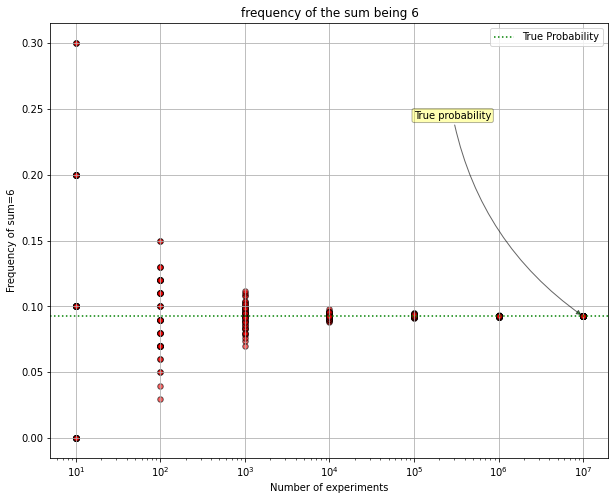

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=30, c='red', edgecolor='black', alpha=0.6)
plt.axhline(y=0.0925925, c='green', linestyle=':', label='True Probability')
plt.xscale('log')
plt.annotate('True probability', (points[-1], 0.0925925), bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             xytext=(10**5, 0.0925925+0.15), arrowprops = dict(facecolor ='green', alpha=0.6, arrowstyle="-|>", connectionstyle="arc3,rad=0.2"))
plt.title('frequency of the sum being 6')
plt.xlabel('Number of experiments')
plt.ylabel('Frequency of sum=6')
plt.grid()
plt.legend(loc='best')
plt.show()

#### №2
Бросается игральная кость. Пусть событие `A` - появление чётного числа, событие `B` - появление числа больше трёх. Являются ли эти события независимыми? Почему?

####Решение
Событие `A` - появление чётного числа
Событие `B` - появление числа больше трёх.

Предположим, что события независимы. Тогда должно выполняться равенство (для независимых событий): $P(A|B) = P(A)$.

Для числа меньше $3$ возможно только одно четное значение: $2$. Для числа больше $3$ возможны четные значения $4$ и $6$. Тогда логично предположить, что вероятность $P(A|B)$, что выпавшее число будет четным при условии, что произошло событие $B$ (выпало число больше $3$) будет равно $\dfrac{2}{3}$ (вероятность выбрать одно четное число среди одного нечетного и двух четных).
$P(A) = \dfrac{1}{2}$, ($P = \dfrac{m}{n}$, где $m = 3$, $n = 6$)

$P(A|B) = \dfrac{2}{3} \neq P(A)$

Следовательно, события $A$ и $B$ зависимы.
